In [0]:
# Importing and downloading required libraries
!pip install gensim
!pip install xlrd
!pip install openpyxl
import pandas as pd
import xlrd
import re
import io
import numpy as np
import math
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [0]:
# Reading dataset and extracting features and emails
data = pd.ExcelFile("Unique2.xlsx")
df = data.parse("Sheet 1")
df = df.dropna()
number_rows = 40000
df = df.iloc[list(range(0, number_rows)), :]

In [0]:
# Converting each document to array
import nltk
documents = df['Cleaned_Email'].tolist()
tokenized_documents = []
nltk.download('punkt')
for i in range(len(documents)):
  tokenized_documents.append(nltk.word_tokenize(documents[i]))

In [0]:
# Training (loading) doc2vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
# documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(tokenized_documents)]

# max_epochs = 10
# vec_size = 20
# alpha = 0.025

# model = Doc2Vec(size=vec_size,
#                 alpha=alpha, 
#                 min_alpha=0.00025,
#                 min_count=1,
#                 dm =0)
  
# model.build_vocab(documents)

# for epoch in range(max_epochs):
#     print('iteration {0}'.format(epoch))
#     model.train(documents,
#                 total_examples=model.corpus_count,
#                 epochs=model.iter)
#     # decrease the learning rate
#     model.alpha -= 0.0002
#     # fix the learning rate, no decay
#     model.min_alpha = model.alpha

# model.save("dv.model_1")
# print("Model Saved")
model= Doc2Vec.load("dv.model_1")

In [0]:
# Converting documents to vector representation
X=[]
for doc in tokenized_documents:
    X.append(model.infer_vector(doc))

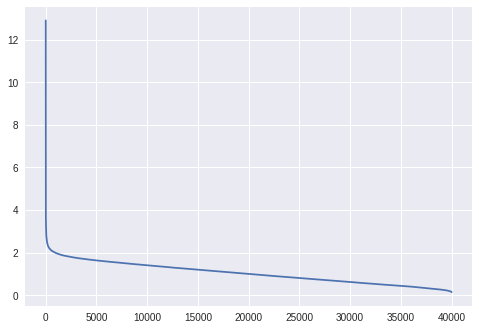

In [0]:
# Approach 1 - DB Scan on entire data
# DBScan parameter estimation
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
# Min_samples set to ln(number of points)
min_samples_set = int(math.ceil(math.log(number_rows)))
nbrs = NearestNeighbors(n_neighbors=min_samples_set).fit(X)
distances, indices = nbrs.kneighbors(X)
distanceDec = sorted(distances[:,min_samples_set-1], reverse=True)
plt.plot(list(range(1,number_rows + 1)), distanceDec)

[-1  0  1  2  3]


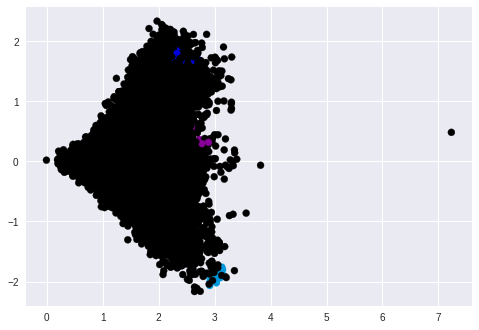

In [0]:
# Performing DBScan
from sklearn.cluster import DBSCAN
from sklearn.decomposition import TruncatedSVD 
import matplotlib
import matplotlib.pyplot as plt
min_samples_set = int(math.ceil(math.log(number_rows)))
db = DBSCAN(eps=1.85, min_samples= min_samples_set).fit(X)
labels = db.labels_
print(np.unique(labels))
svd = TruncatedSVD(n_components = 2)
reduced_data = svd.fit_transform(X)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c = [matplotlib.cm.spectral(float(i) /10) for i in labels])

In [0]:
# Perfomrming KMeans
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances

# for i in range(3,7):
#   km = KMeans(n_clusters= i)
#   km.fit(X)
#   clusters = km.labels_.tolist()
#   print("Clusters: " + str(i) + " Score: " + str(metrics.silhouette_score(X, clusters, metric='euclidean')))

# Max for 5 clusters
km = KMeans(n_clusters= 5)
km.fit(X)
clusters = km.labels_.tolist()

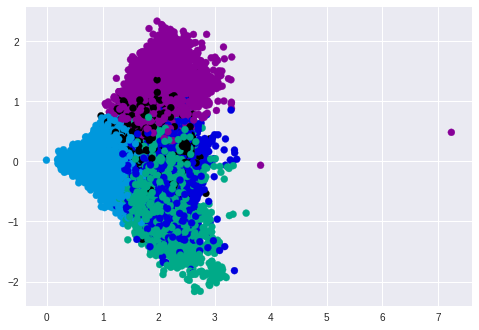

In [0]:
# Plotting KMeans
from sklearn.decomposition import TruncatedSVD 
import matplotlib
import matplotlib.pyplot as plt
plt.scatter(reduced_data[:,0], reduced_data[:,1],  c=[matplotlib.cm.spectral(float(i) /10) for i in clusters])

In [0]:
# Dividing based on Kmeans Clusters
df['KMeans_Labels'] = clusters

# Short work emails. Internal work emails.
df_0 = df[df.KMeans_Labels == 0]
temp_0 = pd.DataFrame(pd.Series(' '.join(df_0['Cleaned_Email']).split()).value_counts()[:200].sort_values())

# Fantasy Football
df_1 = df[df.KMeans_Labels == 1]
temp_1 = pd.DataFrame(pd.Series(' '.join(df_1['Cleaned_Email']).split()).value_counts()[:200].sort_values())

# Talking about gas market. Maybe these are the business emails. COntract deal price.
df_2 = df[df.KMeans_Labels == 2]
temp_2 = pd.DataFrame(pd.Series(' '.join(df_2['Cleaned_Email']).split()).value_counts()[:200].sort_values())

# Mostly spam offers services lots of images. This stayed when size was increased also
df_3 = df[df.KMeans_Labels == 3]
temp_3 = pd.DataFrame(pd.Series(' '.join(df_3['Cleaned_Email']).split()).value_counts()[:200].sort_values())

# Personal Emails 
df_4 = df[df.KMeans_Labels == 4]
temp_4 = pd.DataFrame(pd.Series(' '.join(df_4['Cleaned_Email']).split()).value_counts()[:200].sort_values())


#plt.bar(temp_4.index.values, pd.Series(' '.join(df_4['Cleaned_Email']).split()).value_counts()[:20].sort_values(), align='center', alpha=0.5)
#plt.xticks(rotation='vertical')

,0
bob,754
today,755
possibl,760
custom,762
invest,765
tuesday,770
distribut,774
join,774
presid,783
wednesday,787


In [0]:
# Downloading word frequencies for analysis 
# import openpyxl
# from google.colab import files
# temp_! = temp_1.applymap(lambda x: x.encode('unicode_escape').
#                  decode('utf-8') if isinstance(x, str) else x)
# writer = pd.ExcelWriter('Cluster_1.xlsx', options={'encoding':'utf-8'})
# temp_0.to_excel(writer,'Sheet1')
# writer.save()


In [0]:
# Filtering KMeans Labels 
index_label_0 = df.index[df['KMeans_Labels'] == 0].tolist()
X0 = [X[x-1] for x in index_label_0[:-1]]

index_label_1 = df.index[df['KMeans_Labels'] == 1].tolist()
X1 = [X[x-1] for x in index_label_1[:-1]]

index_label_2 = df.index[df['KMeans_Labels'] == 2].tolist()
X2 = [X[x-1] for x in index_label_2[:-1]]

index_label_3 = df.index[df['KMeans_Labels'] == 3].tolist()
X3 = [X[x-1] for x in index_label_3[:-1]]

index_label_4 = df.index[df['KMeans_Labels'] == 4].tolist()
X4 = [X[x-1] for x in index_label_4[:-1]]


In [0]:
# Determining optimal value of eps Label 3
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
# Min_samples set to ln(number of points)
min_samples_set = int(math.ceil(math.log(len(X3))))
nbrs = NearestNeighbors(n_neighbors=min_samples_set).fit(X3)
distances, indices = nbrs.kneighbors(X3)
distanceDec = sorted(distances[:,min_samples_set-1], reverse=True)
plt.plot(list(range(1,len(X3) + 1)), distanceDec)

In [0]:
from sklearn.cluster import DBSCAN
min_samples_set = int(math.ceil(math.log(len(X3))))
db = DBSCAN(eps=1.83, min_samples=min_samples_set).fit(X3)
labels = db.labels_
svd = TruncatedSVD(n_components = 2)
reduced_data_0 = svd.fit_transform(X0)
print(np.unique(labels))
plt.scatter(reduced_data_0[:,0], reduced_data_0[:,1], c=[matplotlib.cm.spectral(float(i) /10) for i in labels])

In [0]:
# Dividing based on DB Scan
df_0 =  df_0[:-1]
df_0['DBScan_Labels'] = labels

df_0_0 = df_0[df_0.DBScan_Labels == 0]
temp_0_0 = pd.DataFrame(pd.Series(' '.join(df_0_0['Cleaned_Email']).split()).value_counts().sort_values())

df_0_1 = df_0[df_0.DBScan_Labels == 1]
temp_0_1 = pd.DataFrame(pd.Series(' '.join(df_0_1['Cleaned_Email']).split()).value_counts().sort_values())

df_0_2 = df_0[df_0.DBScan_Labels == 2]
temp_0_2 = pd.DataFrame(pd.Series(' '.join(df_0_2['Cleaned_Email']).split()).value_counts().sort_values())

df_0_3 = df_0[df_0.DBScan_Labels == 3]
temp_0_3 = pd.DataFrame(pd.Series(' '.join(df_0_3['Cleaned_Email']).split()).value_counts().sort_values())

df_0_4 = df_0[df_0.DBScan_Labels == 4]
temp_0_4 = pd.DataFrame(pd.Series(' '.join(df_0_4['Cleaned_Email']).split()).value_counts().sort_values())


In [0]:
# Determining optimal value of eps Label 1
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
# Min_samples set to ln(number of points)
min_samples_set = int(math.ceil(math.log(len(X1))))
nbrs = NearestNeighbors(n_neighbors=min_samples_set).fit(X1)
distances, indices = nbrs.kneighbors(X1)
distanceDec = sorted(distances[:,min_samples_set-1], reverse=True)
plt.plot(list(range(1,len(X1) + 1)), distanceDec)

In [0]:
from sklearn.cluster import DBSCAN
min_samples_set = int(math.ceil(math.log(len(X1))))
db = DBSCAN(eps=1.3, min_samples=min_samples_set).fit(X1)
labels = db.labels_
svd = TruncatedSVD(n_components = 2)
reduced_data_1 = svd.fit_transform(X1)
print(np.unique(labels))
plt.scatter(reduced_data_1[:,0], reduced_data_1[:,1], c=[matplotlib.cm.spectral(float(i) /10) for i in labels])

In [0]:
# Dividing based on DB Scan
df_1 =  df_1[:-1]
df_1['DBScan_Labels'] = labels

df_1_0 = df_1[df_1.DBScan_Labels == 0]
temp_1_0 = pd.DataFrame(pd.Series(' '.join(df_1_0['Cleaned_Email']).split()).value_counts()[:20].sort_values())

df_1_1 = df_1[df_1.DBScan_Labels == 1]
temp_1_1 = pd.DataFrame(pd.Series(' '.join(df_1_1['Cleaned_Email']).split()).value_counts()[:20].sort_values())

df_1_2 = df_1[df_1.DBScan_Labels == 2]
temp_1_2 = pd.DataFrame(pd.Series(' '.join(df_1_2['Cleaned_Email']).split()).value_counts()[:20].sort_values())

df_1_3 = df_1[df_1.DBScan_Labels == 3]
temp_1_3 = pd.DataFrame(pd.Series(' '.join(df_1_3['Cleaned_Email']).split()).value_counts()[:20].sort_values())


In [0]:
#import openpyxl
#from google.colab import files
#df = df.applymap(lambda x: x.encode('unicode_escape').
                 decode('utf-8') if isinstance(x, str) else x)
#writer = pd.ExcelWriter('Unique_New.xlsx', options={'encoding':'utf-8'})
#df.to_excel(writer,'Sheet1')
#writer.save()
#files.download('Unique_New.xlsx')